In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/NASA Near-Earth Objects.csv', index_col=0)
df.index = range(1, len(df) + 1) 

df.head()

,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
1,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
2,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
3,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
4,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
5,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [3]:
df.isnull().sum()
df.drop(columns=['neo_reference_id', 'name_limited', 'orbit_id', 'name','designation' ], inplace=True)

Thứ nhất cột designation là id lấy từ số trong cột name, name này chỉ mục đích định danh do nasa đặt
Thứ hai cột name trong ngoặc () có số năm tương ứng với năm trong ngày phát hiện đầu tiên.



=> Xử lí 
1. xóa cột designation.
2. Xóa cột name và name_limited
3. Loại bỏ các cột id , các cột liên quan đến thông tin mô tả, không ảnh hưởng đến phân tích mô hình.

In [4]:

dataFrame_missingData_absolute_magnitude_h  = df[df['absolute_magnitude_h'].isnull()]

In [5]:
dataFrame_missingData_absolute_magnitude_h

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
7093,3592397,NaN,False,False,0.096506,0.215794,AMO,1.030625,1.833895,2010-01-12,2010-01-14,Near-Earth asteroid orbits similar to that of ...
7094,3529628,NaN,False,False,0.242412,0.542051,AMO,1.296142,1.585558,2010-01-14,2010-01-16,Near-Earth asteroid orbits similar to that of ...
7281,3593352,NaN,False,False,0.242412,0.542051,AMO,1.283669,2.252321,2010-04-11,2010-04-13,Near-Earth asteroid orbits similar to that of ...
7293,3593534,NaN,False,False,0.237988,0.532157,AMO,1.124254,1.633350,2010-04-19,2010-04-21,Near-Earth asteroid orbits similar to that of ...
7296,3593636,NaN,False,False,0.050647,0.113250,AMO,1.248248,1.606883,2010-04-28,2010-04-30,Near-Earth asteroid orbits similar to that of ...
7397,3594572,NaN,False,False,0.552783,1.236061,AMO,1.288272,1.780744,2010-06-17,2010-06-21,Near-Earth asteroid orbits similar to that of ...
7400,3536587,NaN,False,False,NaN,NaN,APO,0.809472,1.333837,2010-06-23,2010-06-25,Near-Earth asteroid orbits which cross the Ear...
7401,3536588,NaN,False,False,0.110295,0.246627,APO,0.587842,1.866107,2010-06-23,2010-06-24,Near-Earth asteroid orbits which cross the Ear...


đánh giá : ta nhận thấy các hàng mà cột absolute_magnitude_h có giá trị khuyết thì cột is_potentially_hazardous_asteroid sẽ là fasle 
vì vậy tìm giá trị nào mà với giá trị đó co kha nang cao nhat la false


In [6]:
# non_hazardous_values là một Series chứa các giá trị của cột 'absolute_magnitude_h' của các dòng có giá trị 'is_potentially_hazardous_asteroid' là False
non_hazardous_values = df[df['is_potentially_hazardous_asteroid'] == False]['absolute_magnitude_h']
print(non_hazardous_values.mode())

0    24.8
1    25.4
Name: absolute_magnitude_h, dtype: float64


ở đây nhóm chọn giá trị xuất hiện nhiều nhất trong các giá trị của non_hazardous_values để điền vào các giá trị còn thiếu của cột absolute_magnitude_h

In [7]:
df['absolute_magnitude_h'] =df['absolute_magnitude_h'].fillna(non_hazardous_values.mode()[0])

In [8]:
df.isnull().sum()

id                                   0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    8
kilometers_estimated_diameter_max    8
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               0
last_observation_date                0
orbit_class_description              0
dtype: int64

In [9]:
dataFrame_missingData_kilometers_estimated_diameter_max  = df[df['kilometers_estimated_diameter_max'].isnull()]
dataFrame_missingData_kilometers_estimated_diameter_max

,id,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
7099,3486442,22.01,False,False,NaN,NaN,ATE,0.499066,1.308927,2010-01-19,2022-02-20,Near-Earth asteroid orbits similar to that of ...
7100,3486468,24.50,False,False,NaN,NaN,APO,0.992934,3.807938,2010-01-21,2010-02-19,Near-Earth asteroid orbits which cross the Ear...
7298,3521512,22.50,False,False,NaN,NaN,APO,0.972326,3.523808,2010-04-23,2010-05-16,Near-Earth asteroid orbits which cross the Ear...
7299,3520758,23.60,False,False,NaN,NaN,ATE,0.560438,1.041743,2010-04-20,2015-04-23,Near-Earth asteroid orbits similar to that of ...
7300,3519453,27.00,False,False,NaN,NaN,APO,0.859304,1.572154,2010-05-04,2010-05-08,Near-Earth asteroid orbits which cross the Ear...
7399,3536555,20.70,True,False,NaN,NaN,APO,0.807641,2.704371,2010-06-30,2020-01-29,Near-Earth asteroid orbits which cross the Ear...
7400,3536587,24.80,False,False,NaN,NaN,APO,0.809472,1.333837,2010-06-23,2010-06-25,Near-Earth asteroid orbits which cross the Ear...
7420,3537906,19.30,False,False,NaN,NaN,AMO,1.061093,4.500854,2010-07-21,2020-01-26,Near-Earth asteroid orbits similar to that of ...


nhận xét khi cột kilometers_estimated_diameter_min có những hàng có giá trị null thì cột 'kilometers_estimated_diameter_max' cũng có giá trị null

# phương án một 
- xem xét độ tương quan giữa hai cột kilometers_estimated_diameter_min và kilometers_estimated_diameter_max, nếu có tương quan ta chỉ cần điền một cột , cột còn lại sẽ được tính toán từ cột đã điền
- Xem xét độ tương quan giữa cột kilometers_estimated_diameter_min với cột  absolute_magnitude_h, nếu có tương quan ta sẽ điền cột kilometers_estimated_diameter_max từ cột absolute_magnitude_h


In [10]:
dataFrame_missingData_kilometers_estimated_diameter_max.to_csv('../data/dataFrame_missingData_kilometers_estimated_diameter_max.csv')

Tương quan pearson giữa kilometers_estimated_diameter_max và kilometers_estimated_diameter_min: 0.9999999999999992


<Axes: xlabel='kilometers_estimated_diameter_max', ylabel='kilometers_estimated_diameter_min'>

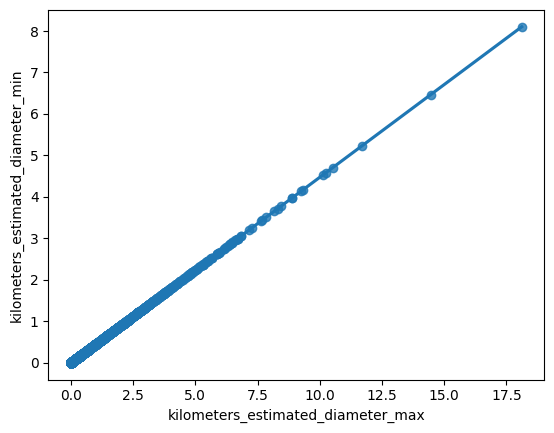

In [11]:
import seaborn as sns
correlation = df['kilometers_estimated_diameter_max'].corr(df['kilometers_estimated_diameter_min'],method='pearson')
print('Tương quan pearson giữa kilometers_estimated_diameter_max và kilometers_estimated_diameter_min:', correlation)
sns.regplot(x='kilometers_estimated_diameter_max', y='kilometers_estimated_diameter_min', data=df)

tương quan giữa hai cột 'kilometers_estimated_diameter_max' và 'kilometers_estimated_diameter_min' 
- hệ số tương quan giữa hai cột là 0.9999999999999992, 
- ta thấy rằng hai cột này có mối tương quan rất mạnh, các điểm nằm tập trung đường thẳng dự đoán
- =>  nên ta sẽ tìm ra quy luật để điền khuyết giá trị dựa trên cột còn lại

In [12]:
# tạo mô hình hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_reg_test = df.dropna(subset=['kilometers_estimated_diameter_max'])
X = df_reg_test[['kilometers_estimated_diameter_min']]
y = df_reg_test['kilometers_estimated_diameter_max']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
print('Mean squared error test:', mean_squared_error(y_test, y_pred))
print('Mean squared error train:', mean_squared_error(y_train, model_linear.predict(X_train)))
print('Score:', model_linear.score(X_test, y_test))


Mean squared error test: 5.079060756600633e-21
Mean squared error train: 5.108182683238987e-21
Score: 1.0


kết quả cho thấy mô hình hồi quy tuyến tính để dự đoạn cột kilometers_estimated_diameter_max dựa trên cột kilometers_estimated_diameter_min là rất hiệu quả

Tương quan pearson giữa kilometers_estimated_diameter_min và absolute_magnitude_h: -0.7153089006656862


<Axes: xlabel='kilometers_estimated_diameter_min', ylabel='absolute_magnitude_h'>

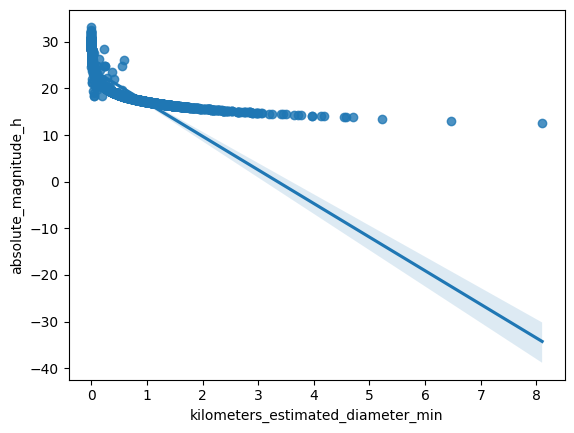

In [13]:
# - Xem xét độ tương quan giữa cột kilometers_estimated_diameter_min với cột  absolute_magnitude_h, nếu có tương quan ta sẽ điền cột kilometers_estimated_diameter_max từ cột absolute_magnitude_h

correlation = df['kilometers_estimated_diameter_min'].corr(df['absolute_magnitude_h'],method='pearson')
print('Tương quan pearson giữa kilometers_estimated_diameter_min và absolute_magnitude_h:', correlation)
sns.regplot(x='kilometers_estimated_diameter_min', y='absolute_magnitude_h', data=df)

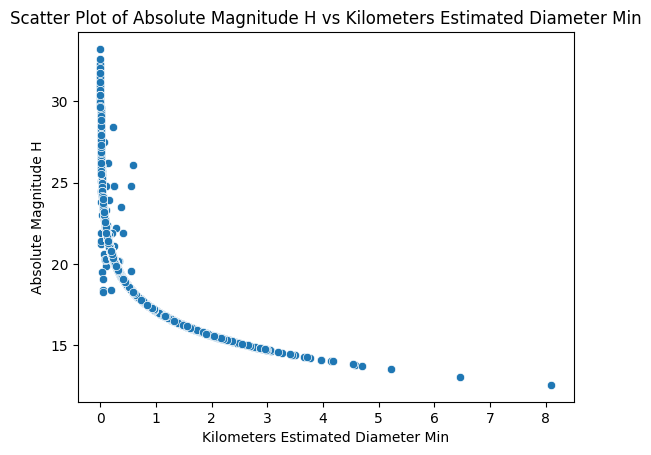

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.scatterplot(x='kilometers_estimated_diameter_min', y='absolute_magnitude_h', data=df)
plt.xlabel('Kilometers Estimated Diameter Min')
plt.ylabel('Absolute Magnitude H')
plt.title('Scatter Plot of Absolute Magnitude H vs Kilometers Estimated Diameter Min')
plt.show()

dựa vào đồ thị ta thấy các điểm dữ liệu phân bố có quy luật, theo kiến thức toán học em thấy nó giống với hàm hyperbol (hàm phân số) y = ax + b/cx + d

Tham số ước lượng: a=-441.36129472952666, b=10980.991622015155, c=756.9961375432638, d=-9045.160097802367
Mean Squared Error (MSE): 0.008408403731414547
R^2 (Train): 0.9020519896761967


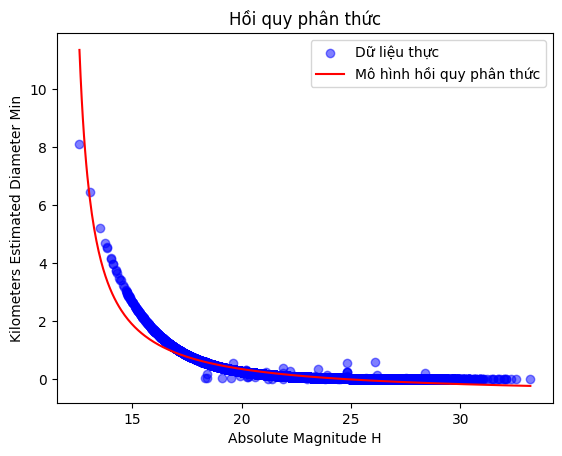

In [15]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df_hyperbol_test = df.dropna(subset=['kilometers_estimated_diameter_min', 'absolute_magnitude_h'])
absolute_magnitude_h = df_hyperbol_test['absolute_magnitude_h']
kilometers_estimated_diameter_min = df_hyperbol_test['kilometers_estimated_diameter_min']

# Định nghĩa mô hình hồi quy phân thức
def fractional_model(x, a, b, c, d):
    return (a * x + b) / (c * x + d)

# Fit mô hình với dữ liệu
params, covariance = curve_fit(fractional_model, absolute_magnitude_h, kilometers_estimated_diameter_min)
a, b, c, d = params
print(f"Tham số ước lượng: a={a}, b={b}, c={c}, d={d}")

# Dự đoán giá trị
x_line = np.linspace(min(absolute_magnitude_h), max(absolute_magnitude_h), 400)
y_pred = fractional_model(x_line, a, b, c, d)

# Tính MSE (Mean Squared Error)
y_train_pred = fractional_model(absolute_magnitude_h, a, b, c, d)
mse = mean_squared_error(kilometers_estimated_diameter_min, y_train_pred)
print(f"Mean Squared Error (MSE): {mse}")
R2 = 1 - (np.sum((kilometers_estimated_diameter_min - y_train_pred) ** 2) / np.sum((kilometers_estimated_diameter_min - np.mean(kilometers_estimated_diameter_min)) ** 2))
print(f"R^2 (Train): {R2}")

# Vẽ biểu đồ
plt.scatter(absolute_magnitude_h, kilometers_estimated_diameter_min, label='Dữ liệu thực', color='blue', alpha=0.5)
plt.plot(x_line, y_pred, label='Mô hình hồi quy phân thức', color='red')
plt.xlabel('Absolute Magnitude H')
plt.ylabel('Kilometers Estimated Diameter Min')
plt.title('Hồi quy phân thức')
plt.legend()
plt.show()







In [16]:
print(f"Giá trị thử:{df['absolute_magnitude_h'][2000]}")
print(f"Giá trị dự đoán:{fractional_model(df['absolute_magnitude_h'][2000], a, b, c, d)}")
print(f"Giá trị thực tế:{df['kilometers_estimated_diameter_min'][2000]}")

Giá trị thử:19.57
Giá trị dự đoán:0.4062138634631001
Giá trị thực tế:0.3240074354


- dùng mô hình để dự đoán giá trị còn thiếu

In [17]:
# Tìm các dòng có giá trị 'kilometers_estimated_diameter_min' bị thiếu
missing_indices = df[df['kilometers_estimated_diameter_min'].isnull()].index

# Dự đoán các giá teij bị thiếu
predicted_values = fractional_model(df['absolute_magnitude_h'][missing_indices], a, b, c, d)

# Điền các giá trị dự đoán vào cột bị thiếu
df.loc[missing_indices, 'kilometers_estimated_diameter_min'] = predicted_values

# Kiểm tra lại
print(df['kilometers_estimated_diameter_min'].isnull().sum())

0


In [18]:
# đự đoán cột kiometers_estimated_diameter_max dựa trên cột kilometers_estimated_diameter_min

# dùng model khi nãy đã dự đoán

# tìm các dòng có giá trị 'kilometers_estimated_diameter_max' bị thiếu
missing_indices = df[df['kilometers_estimated_diameter_max'].isnull()].index

# dự đoán các giá trị bị thiếu
predicted_values = model_linear.predict(df['kilometers_estimated_diameter_min'][missing_indices].values.reshape(-1, 1))

# điền các giá trị dự đoán vào cột bị thiếu
df.loc[missing_indices, 'kilometers_estimated_diameter_max'] = predicted_values

# kiểm tra lại
print(df['kilometers_estimated_diameter_max'].isnull().sum())


0


d:\IE224-Phan tich du lieu\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 1 to 24000
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 24000 non-null  int64  
 1   absolute_magnitude_h               24000 non-null  float64
 2   is_potentially_hazardous_asteroid  24000 non-null  bool   
 3   is_sentry_object                   24000 non-null  bool   
 4   kilometers_estimated_diameter_min  24000 non-null  float64
 5   kilometers_estimated_diameter_max  24000 non-null  float64
 6   orbit_class_type                   24000 non-null  object 
 7   perihelion_distance                24000 non-null  float64
 8   aphelion_distance                  24000 non-null  float64
 9   first_observation_date             24000 non-null  object 
 10  last_observation_date              24000 non-null  object 
 11  orbit_class_description            24000 non-null  obj

In [ ]:
df.to_csv('../../data/NASA Near-Earth Objects-CleanbyThang.csv',index=False)